## Oblique Trees

This small notebook shows how to use the oblique trees for the hls4ml jet tagging dataset and serves as an intro point to the model and dataset classes that are used

In [1]:
!source /opt/Xilinx/Vivado/2024.1/settings64.sh 
!export JSON_ROOT=$(pwd)/json/include


Start by importing some basic things

In [2]:
from dataset import DataSet
from model import YDFObliqueModel
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import plotly.graph_objs as go
from plotly.offline import iplot  # For interactive plots

import plotly.io as pio
pio.renderers.default="colab"

Generate a dataset using the DataSet class method "fromOpenML", more information is found in dataset.py
This pulls the 'hls4ml_lhc_jets_hlf' dataset from hls4ml and creates the DataSet object

The generate test train splits the dataset into X_train, X_test, y_train and y_test
These are then saved to the 'hls4ml_lhc_jets_hlf/' path as .h5 files with a config file that records some features of the dataset

In [3]:
DataSet = DataSet.fromOpenML('hls4ml_lhc_jets_hlf')
DataSet.generate_test_train()
DataSet.save_test_train_h5('hls4ml_lhc_jets_hlf/')

===Train Test Saved====


Create a YDFObliqueModel based on the ClassifierModel found in models.py, this is a ydf GBDT model with oblique splits turned on

In [4]:
model = YDFObliqueModel("ydfmodel","YDFtest/")


Load the model's data from the hls4ml_lhc_jets_hlf/ directory

Train the model and save it 

In [5]:
model.load_data_fromTrainTest('hls4ml_lhc_jets_hlf/')
model.train()
model.save()


Train model on 747000 examples
Model trained in 0:06:11.029136


Load the model (not strictly necessary as the model persists in this notebook but as an example)

Run the model on the test dataset
Evaluate the model creating a ROC plot

Accuracy: 0.7571566265060241
[[0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]


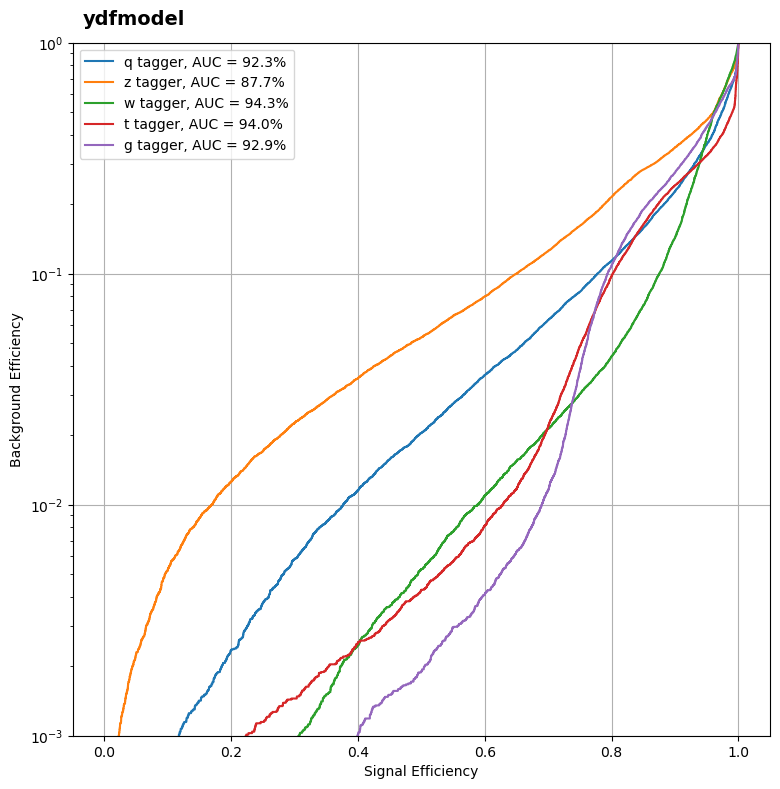

In [9]:
model.load("ydfmodel","YDFtest/")
model.test()
model.evaluate()

Some additional YDF functions for analysing models

In [7]:
model.model.describe()

In [11]:
model.synth_model()

Exception: Couldn't find Xilinx ap_ headers. Source the Vivado/Vitis HLS toolchain, or set XILINX_AP_INCLUDE environment variable.

In [ ]:
model.model.analyze(model.DataSet.test)

In [ ]:
model.model.benchmark(model.DataSet.test)

In [ ]:
model.model.analyze_prediction(model.DataSet.test.iloc[:1])